In [ ]:
# import all the libraries needed for this project
import numpy as np
import pandas as pd
import math
from math import sqrt
from numpy import mean
from numpy.random import rand
from numpy.random import randn
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout, CategoryEncoding, LeakyReLU, ELU
from keras.activations import  selu
from keras.optimizers import Adam ,RMSprop
from keras import  backend as K
import tensorflow as tf
from tensorflow import keras
from keras import Sequential,layers
from keras.layers import BatchNormalization
from keras.layers import Input
#from tensorflow.keras.utils import to_categorical

In [ ]:
train=pd.read_csv("/content/train.csv")
test_x=pd.read_csv("/content/test.csv")

In [ ]:
from sklearn.model_selection import train_test_split

#test_x=test_x.drop(["Id"],axis=1)
#train=train.drop(["Id"],axis=1)
Y=train["SalePrice"]
train = train.drop(["SalePrice"],axis=1)
df=pd.concat([train, test_x])


In [ ]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [ ]:
#getting list of columns with Null Values again
print(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False)[ round(df.isnull().sum()/len(df.index),2) > 0 ] )

PoolQC          99.66
MiscFeature     96.40
Alley           93.22
Fence           80.44
MasVnrType      60.50
FireplaceQu     48.65
LotFrontage     16.65
GarageQual       5.45
GarageCond       5.45
GarageYrBlt      5.45
GarageFinish     5.45
GarageType       5.38
BsmtExposure     2.81
BsmtCond         2.81
BsmtQual         2.77
BsmtFinType2     2.74
BsmtFinType1     2.71
MasVnrArea       0.79
dtype: float64


In [ ]:
df['age']=df['YrSold']-df['YearBuilt']
df['garage_age'] = df['YrSold'] - df['GarageYrBlt']
df['remodel_age'] = df['YrSold'] - df['YearRemodAdd']

df.drop('GarageYrBlt',axis=1,inplace=True)



In [ ]:
#From the Data Description
#NA = No Pool for PoolQC
df['PoolQC'] = df['PoolQC'].fillna('None')
#NA = No Misc Feature for MiscFeature
df['MiscFeature'] = df['MiscFeature'].fillna('None')
#NA = No Alley
df['Alley'] = df['Alley'].fillna('None')
#NA = No Fireplace for FireplaceQu
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')
#NA = No Fence
df['Fence'] = df['Fence'].fillna('None')
#NA = No Fireplace
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')
#NA = No Garage
df['GarageCond'] = df['GarageCond'].fillna('None')
df['GarageType'] = df['GarageType'].fillna('None')
df['GarageFinish'] = df['GarageFinish'].fillna('None')
df['GarageQual'] = df['GarageQual'].fillna('None')
df['garage_age'] = df['GarageQual'].fillna(0)   #No Garage No Age
#NA = No Basement
df['BsmtExposure'] = df['BsmtExposure'].fillna('None')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('None')
df['BsmtCond'] = df['BsmtCond'].fillna('None')
df['BsmtQual'] = df['BsmtQual'].fillna('None')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('None')
#NA = No Masonery Area
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

In [ ]:
#LotFrontage : Replacing Null value with the median of the neighbourhood
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
# Filling the Electrical 0.06% rows with the mode
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [ ]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,age,garage_age,remodel_age
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,None,None,0,2,2008,WD,Normal,5,TA,5
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,None,None,0,5,2007,WD,Normal,31,TA,31
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,None,None,0,9,2008,WD,Normal,7,TA,6
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,None,None,0,2,2006,WD,Abnorml,91,TA,36
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,None,None,0,12,2008,WD,Normal,8,TA,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,None,Reg,Lvl,AllPub,...,None,None,0,6,2006,WD,Normal,36,None,36
1455,2916,160,RM,21.0,1894,Pave,None,Reg,Lvl,AllPub,...,None,None,0,4,2006,WD,Abnorml,36,TA,36
1456,2917,20,RL,160.0,20000,Pave,None,Reg,Lvl,AllPub,...,None,None,0,9,2006,WD,Abnorml,46,TA,10
1457,2918,85,RL,62.0,10441,Pave,None,Reg,Lvl,AllPub,...,MnPrv,Shed,700,7,2006,WD,Normal,14,None,14


In [ ]:
#obtain all the numerical features
ids = df["Id"]
df=df.drop(["Id"],axis=1)
numerical_features = df.dtypes[df.dtypes != 'object'].index
non_numerical_features= df.dtypes[df.dtypes=="object"].index
#train_x[non_numerical_features]=to_categorical(train_x[non_numerical_features])
#apply standardization to each feature
df=df.fillna(0)

#standardization
#df[numerical_features] = df[numerical_features].apply( lambda x: (x-x.mean()) / x.std())
#df = pd.get_dummies(df, columns=non_numerical_features, dtype=float)



In [ ]:
df["id"] = ids
sam_test = df[df["id"] > 1460]
train_x = df[df["id"] <= 1460]

# Use .loc to avoid SettingWithCopyWarning
sam_test.loc[:, numerical_features] = sam_test[numerical_features].apply(lambda x: (x - x.mean()) / x.std())
train_x.loc[:, numerical_features] = train_x[numerical_features].apply(lambda x: (x - x.mean()) / x.std())

train_x

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,age,garage_age,remodel_age,id
0,0.073350,RL,-0.230743,-0.207071,Pave,None,Reg,Lvl,AllPub,Inside,...,None,-0.087658,-1.598563,0.138730,WD,Normal,-1.042902,TA,-0.869643,1
1,-0.872264,RL,0.437901,-0.091855,Pave,None,Reg,Lvl,AllPub,FR2,...,None,-0.087658,-0.488943,-0.614228,WD,Normal,-0.183402,TA,0.390007,2
2,0.073350,RL,-0.097014,0.073455,Pave,None,IR1,Lvl,AllPub,Inside,...,None,-0.087658,0.990552,0.138730,WD,Normal,-0.976787,TA,-0.821195,3
3,0.309753,RL,-0.453625,-0.096864,Pave,None,IR1,Lvl,AllPub,Corner,...,None,-0.087658,-1.598563,-1.367186,WD,Abnorml,1.800059,TA,0.632247,4
4,0.073350,RL,0.616206,0.375020,Pave,None,IR1,Lvl,AllPub,FR2,...,None,-0.087658,2.100173,0.138730,WD,Normal,-0.943729,TA,-0.724299,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073350,RL,-0.364472,-0.260471,Pave,None,Reg,Lvl,AllPub,Inside,...,None,-0.087658,0.620678,-0.614228,WD,Normal,-0.943729,TA,-0.772747,1456
1456,-0.872264,RL,0.660782,0.266316,Pave,None,Reg,Lvl,AllPub,Inside,...,None,-0.087658,-1.598563,1.644646,WD,Normal,-0.150345,TA,-0.046026,1457
1457,0.309753,RL,-0.186167,-0.147760,Pave,None,Reg,Lvl,AllPub,Inside,...,Shed,4.951415,-0.488943,1.644646,WD,Normal,1.072790,TA,-0.918091,1458
1458,-0.872264,RL,-0.097014,-0.080133,Pave,None,Reg,Lvl,AllPub,Inside,...,None,-0.087658,-0.858816,1.644646,WD,Normal,0.775271,TA,-0.433610,1459


In [ ]:

from sklearn.preprocessing import OrdinalEncoder
# OrdinalEncoder nesnesini oluştur
encoder = OrdinalEncoder()


# Kategorik sütunları dönüştür
train_x[non_numerical_features] = encoder.fit_transform(train_x[non_numerical_features])

print(train_x)

      MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
0       0.073350       3.0    -0.230743 -0.207071     1.0    1.0       3.0   
1      -0.872264       3.0     0.437901 -0.091855     1.0    1.0       3.0   
2       0.073350       3.0    -0.097014  0.073455     1.0    1.0       0.0   
3       0.309753       3.0    -0.453625 -0.096864     1.0    1.0       0.0   
4       0.073350       3.0     0.616206  0.375020     1.0    1.0       0.0   
...          ...       ...          ...       ...     ...    ...       ...   
1455    0.073350       3.0    -0.364472 -0.260471     1.0    1.0       3.0   
1456   -0.872264       3.0     0.660782  0.266316     1.0    1.0       3.0   
1457    0.309753       3.0    -0.186167 -0.147760     1.0    1.0       3.0   
1458   -0.872264       3.0    -0.097014 -0.080133     1.0    1.0       3.0   
1459   -0.872264       3.0     0.215019 -0.058092     1.0    1.0       3.0   

      LandContour  Utilities  LotConfig  ...  MiscFeature   Mis

<ipython-input-12-a02a35395d2b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_x[non_numerical_features] = encoder.fit_transform(train_x[non_numerical_features])


In [ ]:
sam_test = sam_test.drop(["id"],axis=1)
train_x = train_x.drop(["id"],axis=1)
train_x

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,age,garage_age,remodel_age
0,0.073350,3.0,-0.230743,-0.207071,1.0,1.0,3.0,3.0,0.0,4.0,...,4.0,1.0,-0.087658,-1.598563,0.138730,8.0,4.0,-1.042902,5.0,-0.869643
1,-0.872264,3.0,0.437901,-0.091855,1.0,1.0,3.0,3.0,0.0,2.0,...,4.0,1.0,-0.087658,-0.488943,-0.614228,8.0,4.0,-0.183402,5.0,0.390007
2,0.073350,3.0,-0.097014,0.073455,1.0,1.0,0.0,3.0,0.0,4.0,...,4.0,1.0,-0.087658,0.990552,0.138730,8.0,4.0,-0.976787,5.0,-0.821195
3,0.309753,3.0,-0.453625,-0.096864,1.0,1.0,0.0,3.0,0.0,0.0,...,4.0,1.0,-0.087658,-1.598563,-1.367186,8.0,0.0,1.800059,5.0,0.632247
4,0.073350,3.0,0.616206,0.375020,1.0,1.0,0.0,3.0,0.0,2.0,...,4.0,1.0,-0.087658,2.100173,0.138730,8.0,4.0,-0.943729,5.0,-0.724299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073350,3.0,-0.364472,-0.260471,1.0,1.0,3.0,3.0,0.0,4.0,...,4.0,1.0,-0.087658,0.620678,-0.614228,8.0,4.0,-0.943729,5.0,-0.772747
1456,-0.872264,3.0,0.660782,0.266316,1.0,1.0,3.0,3.0,0.0,4.0,...,2.0,1.0,-0.087658,-1.598563,1.644646,8.0,4.0,-0.150345,5.0,-0.046026
1457,0.309753,3.0,-0.186167,-0.147760,1.0,1.0,3.0,3.0,0.0,4.0,...,0.0,3.0,4.951415,-0.488943,1.644646,8.0,4.0,1.072790,5.0,-0.918091
1458,-0.872264,3.0,-0.097014,-0.080133,1.0,1.0,3.0,3.0,0.0,4.0,...,4.0,1.0,-0.087658,-0.858816,1.644646,8.0,4.0,0.775271,5.0,-0.433610


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_x, Y, test_size=0.15, random_state=42)

In [ ]:
y_train

984     126000
777     142500
707     254000
598     217500
874      66500
         ...  
1095    176432
1130    135000
1294    115000
860     189950
1126    174000
Name: SalePrice, Length: 1241, dtype: int64

In [ ]:
#Min max for test and train data
y_min=np.min(y_train)
y_max=np.max(y_train)
y_train=(y_train- y_min)/ (y_max - y_min)

y_min=np.min(y_test)
y_max=np.max(y_test)
y_test=(y_test- y_min)/ (y_max - y_min)

In [ ]:
y_train

984     0.128292
777     0.151528
707     0.308548
598     0.257147
874     0.044501
          ...   
1095    0.199313
1130    0.140966
1294    0.112801
860     0.218350
1126    0.195888
Name: SalePrice, Length: 1241, dtype: float64

In [ ]:
xtrain, xval, ytrain, yval = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [ ]:
#model 0 just layers


modelbest = Sequential([
    Dense(units=2048, activation='relu', input_dim=81),  # Giriş katmanındaki nöron sayısını artırın

    Dense(units=1536, activation='relu'),

    Dense(units=1280, activation='relu'),

    Dense(units=1536, activation='relu'),

    Dense(units=1536, activation='relu'),

    Dense(units=1536, activation='relu'),

    Dense(units=1280, activation='relu'),

    Dense(units=1, activation='linear')

])
# Compile the model
modelbest.compile(loss="mean_squared_error",
              optimizer="adam",
              metrics=["mean_squared_error"])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

history0 = modelbest.fit(xtrain, ytrain, epochs=50,
                    validation_data=(xval, yval),
                    callbacks=[early_stopping, reduce_lr])


modelbest.evaluate(X_test, y_test)   # Remember to scale test data

Epoch 1/50
33/33 [==============================] - 13s 270ms/step - loss: 13.6195 - mean_squared_error: 13.6195 - val_loss: 0.0080 - val_mean_squared_error: 0.0080 - lr: 0.0010
Epoch 2/50
33/33 [==============================] - 13s 395ms/step - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.0034 - val_mean_squared_error: 0.0034 - lr: 0.0010
Epoch 3/50
33/33 [==============================] - 9s 275ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0041 - val_mean_squared_error: 0.0041 - lr: 0.0010
Epoch 4/50
33/33 [==============================] - 8s 237ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0064 - val_mean_squared_error: 0.0064 - lr: 0.0010
Epoch 5/50
33/33 [==============================] - 7s 203ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0018 - val_mean_squared_error: 0.0018 - lr: 0.0010
Epoch 6/50
33/33 [==============================] - 8s 242ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss:

[0.0013463216600939631, 0.0013463216600939631]

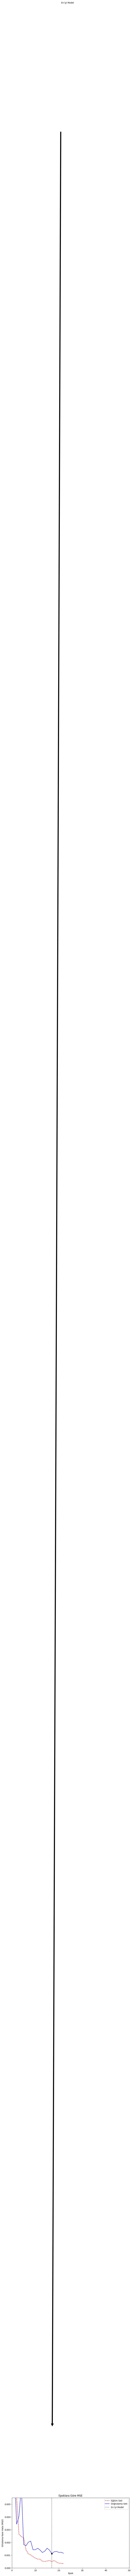

In [ ]:
train_loss = history0.history['mean_squared_error']
val_loss = history0.history['val_mean_squared_error']

# En iyi modeli bulma
best_epoch = np.argmin(val_loss)
best_val_loss = val_loss[best_epoch]

# Grafik çizme
epochs = range(1, 23)
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'r--', label='Eğitim Seti')
plt.plot(epochs, val_loss, 'b-', label='Doğrulama Seti')

# En iyi modele ait çizgileri ekleme
plt.axvline(best_epoch + 1, color='k', linestyle=':', label='En İyi Model')  # +1 çünkü epoklar grafikte 1'den başlıyor
plt.scatter(best_epoch + 1, best_val_loss, color='black')  # En iyi model noktasını işaretleme

# Metin ekleme
plt.annotate('En İyi Model', xy=(best_epoch + 1, best_val_loss), xytext=(best_epoch + 5, best_val_loss + 0.2),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel('Epok')
plt.ylabel('Ortalama Kare Hata (MSE)')
plt.legend()
plt.title('Epoklara Göre MSE')
plt.ylim(0, 0.0055)  # Y eksenini 0 ile 1 arasında sınırlandırma
plt.xlim(0, 50)  # X eksenini 0 ile 50 epok arasında sınırlandırma
plt.show()

In [ ]:
#model 1 BN ile

modelbest1 = Sequential([


    Dense(units=2048, activation='relu', input_dim=81),  # Giriş katmanındaki nöron sayısını artırın
    BatchNormalization(),

    Dense(units=1536, activation='relu'),
    BatchNormalization(),

    Dense(units=1280, activation='relu'),
    BatchNormalization(),

    Dense(units=1536, activation='relu'),
    BatchNormalization(),

    Dense(units=1536, activation='relu'),
    BatchNormalization(),

    Dense(units=1536, activation='relu'),
    BatchNormalization(),

    Dense(units=1280, activation='relu'),
    BatchNormalization(),

    Dense(units=1, activation='linear')

])

modelbest1.compile(loss="mean_squared_error",
              optimizer="adam",
              metrics=["mean_squared_error"])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

history1 = modelbest1.fit(xtrain, ytrain, epochs=50,
                    validation_data=(xval, yval),
                    callbacks=[early_stopping, reduce_lr])

modelbest1.evaluate(X_test, y_test)  # Remember to scale test data as well

Epoch 1/50
33/33 [==============================] - 11s 243ms/step - loss: 6.9162 - mean_squared_error: 6.9162 - val_loss: 3.7593 - val_mean_squared_error: 3.7593 - lr: 0.0010
Epoch 2/50
33/33 [==============================] - 7s 204ms/step - loss: 0.1846 - mean_squared_error: 0.1846 - val_loss: 0.9288 - val_mean_squared_error: 0.9288 - lr: 0.0010
Epoch 3/50
33/33 [==============================] - 8s 242ms/step - loss: 0.0470 - mean_squared_error: 0.0470 - val_loss: 0.1200 - val_mean_squared_error: 0.1200 - lr: 0.0010
Epoch 4/50
33/33 [==============================] - 6s 186ms/step - loss: 0.0266 - mean_squared_error: 0.0266 - val_loss: 0.0326 - val_mean_squared_error: 0.0326 - lr: 0.0010
Epoch 5/50
33/33 [==============================] - 9s 270ms/step - loss: 0.0209 - mean_squared_error: 0.0209 - val_loss: 0.0462 - val_mean_squared_error: 0.0462 - lr: 0.0010
Epoch 6/50
33/33 [==============================] - 11s 324ms/step - loss: 0.0183 - mean_squared_error: 0.0183 - val_loss: 0

[0.0099798534065485, 0.0099798534065485]

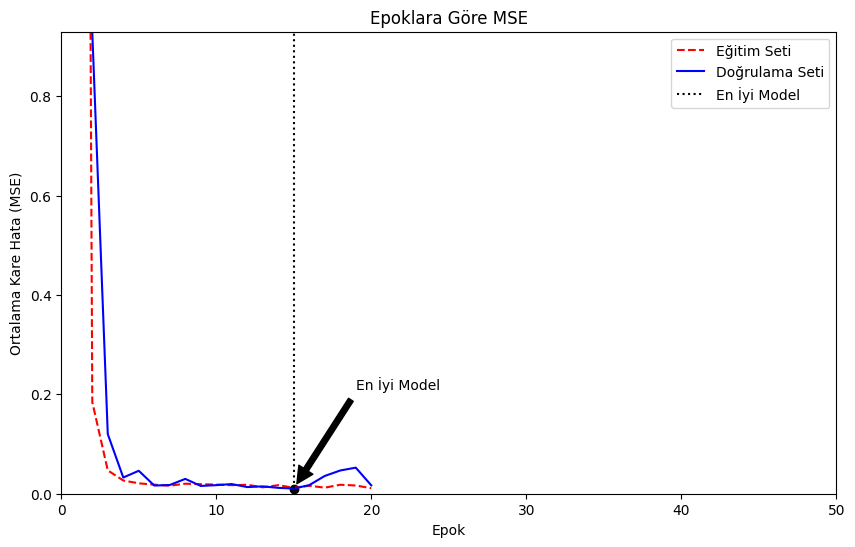

In [ ]:
train_loss = history1.history['mean_squared_error']
val_loss = history1.history['val_mean_squared_error']

# En iyi modeli bulma
best_epoch = np.argmin(val_loss)
best_val_loss = val_loss[best_epoch]

# Grafik çizme
epochs = range(1, 21)
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'r--', label='Eğitim Seti')
plt.plot(epochs, val_loss, 'b-', label='Doğrulama Seti')

# En iyi modele ait çizgileri ekleme
plt.axvline(best_epoch + 1, color='k', linestyle=':', label='En İyi Model')  # +1 çünkü epoklar grafikte 1'den başlıyor
plt.scatter(best_epoch + 1, best_val_loss, color='black')  # En iyi model noktasını işaretleme

# Metin ekleme
plt.annotate('En İyi Model', xy=(best_epoch + 1, best_val_loss), xytext=(best_epoch + 5, best_val_loss + 0.2),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel('Epok')
plt.ylabel('Ortalama Kare Hata (MSE)')
plt.legend()
plt.title('Epoklara Göre MSE')
plt.ylim(0, 0.93)  # Y eksenini 0 ile 1 arasında sınırlandırma
plt.xlim(0, 50)  # X eksenini 0 ile 50 epok arasında sınırlandırma
plt.show()

In [ ]:
#model 2 with bn and dropout

modelbest2 = Sequential([
    Dense(units=2048, activation='relu', input_dim=81),  # Giriş katmanındaki nöron sayısını artırın
    BatchNormalization(),
    Dropout(0.2),

    Dense(units=1536, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(units=1280, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(units=1536, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(units=1536, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(units=1536, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(units=1280, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),# 1 nöronlu çıktı katmanı (fiyat tahmini)

    Dense(units=1, activation='linear')
])

modelbest2.compile(loss="mean_squared_error",
              optimizer="adam",
              metrics=["mean_squared_error"])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

history2 = modelbest2.fit(xtrain, ytrain, epochs=50,
                    validation_data=(xval, yval),
                    callbacks=[early_stopping, reduce_lr])

modelbest2.evaluate(X_test, y_test)

Epoch 1/50
33/33 [==============================] - 13s 272ms/step - loss: 7.1514 - mean_squared_error: 7.1514 - val_loss: 1.5849 - val_mean_squared_error: 1.5849 - lr: 0.0010
Epoch 2/50
33/33 [==============================] - 7s 216ms/step - loss: 1.0780 - mean_squared_error: 1.0780 - val_loss: 0.4037 - val_mean_squared_error: 0.4037 - lr: 0.0010
Epoch 3/50
33/33 [==============================] - 8s 237ms/step - loss: 0.6304 - mean_squared_error: 0.6304 - val_loss: 0.7296 - val_mean_squared_error: 0.7296 - lr: 0.0010
Epoch 4/50
33/33 [==============================] - 7s 223ms/step - loss: 0.4501 - mean_squared_error: 0.4501 - val_loss: 0.1457 - val_mean_squared_error: 0.1457 - lr: 0.0010
Epoch 5/50
33/33 [==============================] - 9s 263ms/step - loss: 0.4529 - mean_squared_error: 0.4529 - val_loss: 0.0797 - val_mean_squared_error: 0.0797 - lr: 0.0010
Epoch 6/50
33/33 [==============================] - 7s 213ms/step - loss: 0.4182 - mean_squared_error: 0.4182 - val_loss: 0.

[0.0189554113894701, 0.0189554113894701]

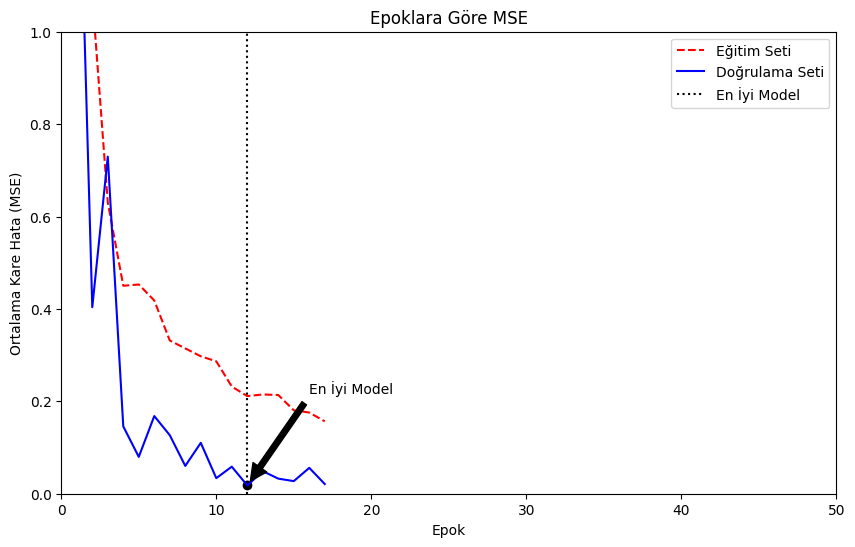

In [ ]:
train_loss = history2.history['mean_squared_error']
val_loss = history2.history['val_mean_squared_error']

# En iyi modeli bulma
best_epoch = np.argmin(val_loss)
best_val_loss = val_loss[best_epoch]

# Grafik çizme
epochs = range(1, 18)
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'r--', label='Eğitim Seti')
plt.plot(epochs, val_loss, 'b-', label='Doğrulama Seti')

# En iyi modele ait çizgileri ekleme
plt.axvline(best_epoch + 1, color='k', linestyle=':', label='En İyi Model')  # +1 çünkü epoklar grafikte 1'den başlıyor
plt.scatter(best_epoch + 1, best_val_loss, color='black')  # En iyi model noktasını işaretleme

# Metin ekleme
plt.annotate('En İyi Model', xy=(best_epoch + 1, best_val_loss), xytext=(best_epoch + 5, best_val_loss + 0.2),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel('Epok')
plt.ylabel('Ortalama Kare Hata (MSE)')
plt.legend()
plt.title('Epoklara Göre MSE')
plt.ylim(0,1)  # Y eksenini 0 ile 1 arasında sınırlandırma
plt.xlim(0, 50)  # X eksenini 0 ile 50 epok arasında sınırlandırma
plt.show()

In [ ]:
#model 3 just dropout

modelbest3 = Sequential([

    Dense(units=2048, activation='relu', input_dim=81),  # Giriş katmanındaki nöron sayısını artırın

    Dropout(0.2),

    Dense(units=1536, activation='relu'),

    Dropout(0.2),

    Dense(units=1280, activation='relu'),

    Dropout(0.2),

    Dense(units=1536, activation='relu'),

    Dropout(0.2),

    Dense(units=1536, activation='relu'),

    Dropout(0.2),

    Dense(units=1536, activation='relu'),

    Dropout(0.2),

    Dense(units=1280, activation='relu'),

    Dropout(0.2),# 1 nöronlu çıktı katmanı (fiyat tahmini)


    Dense(units=1, activation='linear')  # 1 nöronlu çıktı katmanı (fiyat tahmini)
])

modelbest3.compile(loss="mean_squared_error",
              optimizer="adam",
              metrics=["mean_squared_error"])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

history3 = modelbest3.fit(xtrain, ytrain, epochs=50,
                    validation_data=(xval, yval),
                    callbacks=[early_stopping, reduce_lr])

modelbest3.evaluate(X_test, y_test)

Epoch 1/50
33/33 [==============================] - 11s 241ms/step - loss: 8.7476 - mean_squared_error: 8.7476 - val_loss: 0.0149 - val_mean_squared_error: 0.0149 - lr: 0.0010
Epoch 2/50
33/33 [==============================] - 9s 285ms/step - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0121 - val_mean_squared_error: 0.0121 - lr: 0.0010
Epoch 3/50
33/33 [==============================] - 7s 201ms/step - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0053 - val_mean_squared_error: 0.0053 - lr: 0.0010
Epoch 4/50
33/33 [==============================] - 8s 233ms/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0094 - val_mean_squared_error: 0.0094 - lr: 0.0010
Epoch 5/50
33/33 [==============================] - 7s 198ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0091 - val_mean_squared_error: 0.0091 - lr: 0.0010
Epoch 6/50
33/33 [==============================] - 8s 242ms/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.

[0.0031096816528588533, 0.003109681187197566]

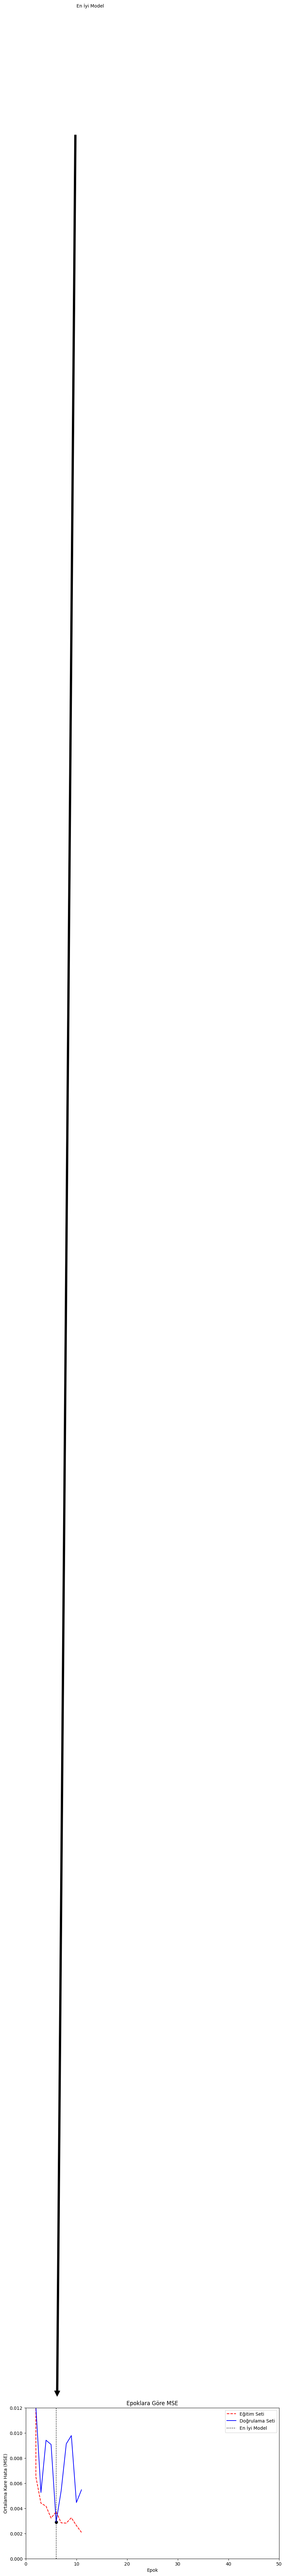

In [ ]:
train_loss = history3.history['mean_squared_error']
val_loss = history3.history['val_mean_squared_error']

# En iyi modeli bulma
best_epoch = np.argmin(val_loss)
best_val_loss = val_loss[best_epoch]

# Grafik çizme
epochs = range(1, 12)
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'r--', label='Eğitim Seti')
plt.plot(epochs, val_loss, 'b-', label='Doğrulama Seti')

# En iyi modele ait çizgileri ekleme
plt.axvline(best_epoch + 1, color='k', linestyle=':', label='En İyi Model')  # +1 çünkü epoklar grafikte 1'den başlıyor
plt.scatter(best_epoch + 1, best_val_loss, color='black')  # En iyi model noktasını işaretleme

# Metin ekleme
plt.annotate('En İyi Model', xy=(best_epoch + 1, best_val_loss), xytext=(best_epoch + 5, best_val_loss + 0.2),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel('Epok')
plt.ylabel('Ortalama Kare Hata (MSE)')
plt.legend()
plt.title('Epoklara Göre MSE')
plt.ylim(0, 0.012)  # Y eksenini 0 ile 1 arasında sınırlandırma
plt.xlim(0, 50)  # X eksenini 0 ile 50 epok arasında sınırlandırma
plt.show()

In [ ]:
#model4 less complicated

modelbest4 = Sequential([
    Dense(units=2000, activation='relu', input_dim=81),  # 250 nöronlu giriş katmanı


    Dense(units=1000, activation='relu'),  # 350 nöronlu 1. gizli katman

    Dense(units=500, activation='relu'),


    Dense(units=250, activation='relu'),  # 150 nöronlu 3. gizli katman

    Dense(units=1, activation='linear')  # 1 nöronlu çıktı katmanı (fiyat tahmini)
])

modelbest4.compile(loss="mean_squared_error",
              optimizer="adam",
              metrics=["mean_squared_error"])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

history4 = modelbest4.fit(xtrain, ytrain, epochs=50,
                    validation_data=(xval, yval),
                    callbacks=[early_stopping, reduce_lr])

modelbest4.evaluate(X_test, y_test)

Epoch 1/50
33/33 [==============================] - 3s 54ms/step - loss: 1.7987 - mean_squared_error: 1.7987 - val_loss: 0.0058 - val_mean_squared_error: 0.0058 - lr: 0.0010
Epoch 2/50
33/33 [==============================] - 1s 36ms/step - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0039 - val_mean_squared_error: 0.0039 - lr: 0.0010
Epoch 3/50
33/33 [==============================] - 1s 40ms/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0037 - val_mean_squared_error: 0.0037 - lr: 0.0010
Epoch 4/50
33/33 [==============================] - 1s 45ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0064 - val_mean_squared_error: 0.0064 - lr: 0.0010
Epoch 5/50
33/33 [==============================] - 1s 43ms/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0039 - val_mean_squared_error: 0.0039 - lr: 0.0010
Epoch 6/50
33/33 [==============================] - 1s 39ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0051 - 

[0.0019717542454600334, 0.0019717542454600334]

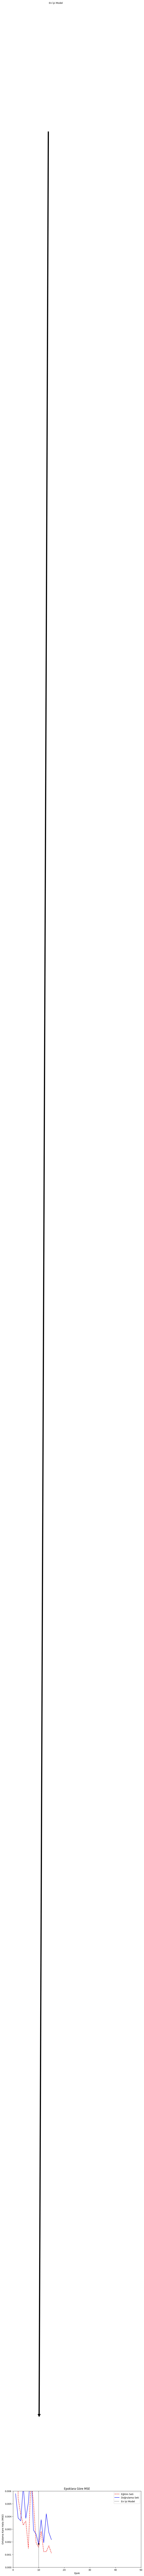

In [ ]:
train_loss = history4.history['mean_squared_error']
val_loss = history4.history['val_mean_squared_error']

# En iyi modeli bulma
best_epoch = np.argmin(val_loss)
best_val_loss = val_loss[best_epoch]

# Grafik çizme
epochs = range(1, 16)
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'r--', label='Eğitim Seti')
plt.plot(epochs, val_loss, 'b-', label='Doğrulama Seti')

# En iyi modele ait çizgileri ekleme
plt.axvline(best_epoch + 1, color='k', linestyle=':', label='En İyi Model')  # +1 çünkü epoklar grafikte 1'den başlıyor
plt.scatter(best_epoch + 1, best_val_loss, color='black')  # En iyi model noktasını işaretleme

# Metin ekleme
plt.annotate('En İyi Model', xy=(best_epoch + 1, best_val_loss), xytext=(best_epoch + 5, best_val_loss + 0.2),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel('Epok')
plt.ylabel('Ortalama Kare Hata (MSE)')
plt.legend()
plt.title('Epoklara Göre MSE')
plt.ylim(0, 0.006)  # Y eksenini 0 ile 1 arasında sınırlandırma
plt.xlim(0, 50)  # X eksenini 0 ile 50 epok arasında sınırlandırma
plt.show()

In [ ]:
#model 5 L1 ile
from keras.regularizers import L1,L2

modelbest5 = Sequential([
    Dense(units=2048, activation='relu', input_dim=81, kernel_regularizer=L1(l1=0.01)),  # 250 nöronlu giriş katmanı

    Dense(units=1536, activation='relu'),

    Dense(units=1280, activation='relu'),

    Dense(units=1536, activation='relu'),

    Dense(units=1536, activation='relu'),

    Dense(units=1536, activation='relu'),

    Dense(units=1280, activation='relu'),

    Dense(units=1, activation='linear')
])

modelbest5.compile(loss="mean_squared_error",
              optimizer="adam",
              metrics=["mean_squared_error"])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

history5 = modelbest5.fit(xtrain, ytrain, epochs=50,
                    validation_data=(xval, yval),
                    callbacks=[early_stopping, reduce_lr])

modelbest5.evaluate(X_test, y_test)

Epoch 1/50
33/33 [==============================] - 10s 270ms/step - loss: 49.2263 - mean_squared_error: 15.6295 - val_loss: 24.5507 - val_mean_squared_error: 0.0105 - lr: 0.0010
Epoch 2/50
33/33 [==============================] - 6s 194ms/step - loss: 19.6769 - mean_squared_error: 0.0072 - val_loss: 16.1187 - val_mean_squared_error: 0.0055 - lr: 0.0010
Epoch 3/50
33/33 [==============================] - 7s 216ms/step - loss: 14.2148 - mean_squared_error: 0.0051 - val_loss: 12.5556 - val_mean_squared_error: 0.0049 - lr: 0.0010
Epoch 4/50
33/33 [==============================] - 6s 182ms/step - loss: 11.4530 - mean_squared_error: 0.0037 - val_loss: 10.4331 - val_mean_squared_error: 0.0044 - lr: 0.0010
Epoch 5/50
33/33 [==============================] - 8s 236ms/step - loss: 9.6821 - mean_squared_error: 0.0042 - val_loss: 8.9606 - val_mean_squared_error: 0.0048 - lr: 0.0010
Epoch 6/50
33/33 [==============================] - 6s 188ms/step - loss: 8.4005 - mean_squared_error: 0.0037 - val

[0.2598857581615448, 0.003201067680492997]

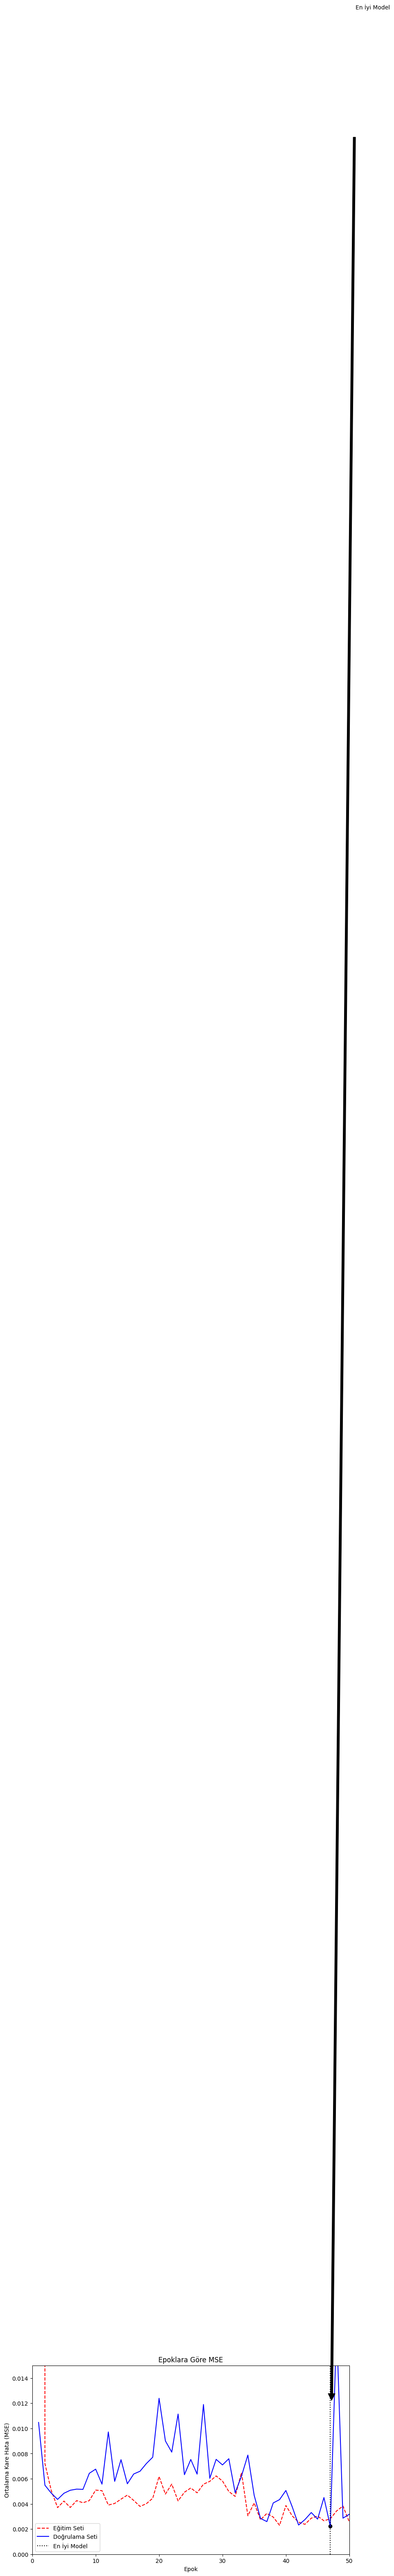

In [ ]:
train_loss = history5.history['mean_squared_error']
val_loss = history5.history['val_mean_squared_error']

# En iyi modeli bulma
best_epoch = np.argmin(val_loss)
best_val_loss = val_loss[best_epoch]

# Grafik çizme
epochs = range(1, 51)
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'r--', label='Eğitim Seti')
plt.plot(epochs, val_loss, 'b-', label='Doğrulama Seti')

# En iyi modele ait çizgileri ekleme
plt.axvline(best_epoch + 1, color='k', linestyle=':', label='En İyi Model')  # +1 çünkü epoklar grafikte 1'den başlıyor
plt.scatter(best_epoch + 1, best_val_loss, color='black')  # En iyi model noktasını işaretleme

# Metin ekleme
plt.annotate('En İyi Model', xy=(best_epoch + 1, best_val_loss), xytext=(best_epoch + 5, best_val_loss + 0.2),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel('Epok')
plt.ylabel('Ortalama Kare Hata (MSE)')
plt.legend()
plt.title('Epoklara Göre MSE')
plt.ylim(0, 0.015)  # Y eksenini 0 ile 1 arasında sınırlandırma
plt.xlim(0, 50)  # X eksenini 0 ile 50 epok arasında sınırlandırma
plt.show()

In [ ]:
#model 6 L2 ile
modelbest6 = Sequential([
    Dense(units=2048, activation='relu', input_dim=81, kernel_regularizer=L2(l2=0.01)),  # 250 nöronlu giriş katmanı

    Dense(units=1536, activation='relu'),

    Dense(units=1280, activation='relu'),

    Dense(units=1536, activation='relu'),

    Dense(units=1536, activation='relu'),

    Dense(units=1536, activation='relu'),

    Dense(units=1280, activation='relu'),

    Dense(units=1, activation='linear')
])

modelbest6.compile(loss="mean_squared_error",
              optimizer="adam",
              metrics=["mean_squared_error"])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

history6 = modelbest6.fit(xtrain, ytrain, epochs=50,
                    validation_data=(xval, yval),
                    callbacks=[early_stopping, reduce_lr])

modelbest6.evaluate(X_test, y_test)

Epoch 1/50
33/33 [==============================] - 9s 232ms/step - loss: 6.9993 - mean_squared_error: 5.7779 - val_loss: 1.0137 - val_mean_squared_error: 0.0094 - lr: 0.0010
Epoch 2/50
33/33 [==============================] - 6s 187ms/step - loss: 0.9088 - mean_squared_error: 0.0054 - val_loss: 0.8245 - val_mean_squared_error: 0.0043 - lr: 0.0010
Epoch 3/50
33/33 [==============================] - 8s 237ms/step - loss: 0.7670 - mean_squared_error: 0.0027 - val_loss: 0.7140 - val_mean_squared_error: 0.0028 - lr: 0.0010
Epoch 4/50
33/33 [==============================] - 7s 201ms/step - loss: 0.6730 - mean_squared_error: 0.0027 - val_loss: 0.6349 - val_mean_squared_error: 0.0046 - lr: 0.0010
Epoch 5/50
33/33 [==============================] - 8s 255ms/step - loss: 0.6013 - mean_squared_error: 0.0027 - val_loss: 0.5720 - val_mean_squared_error: 0.0048 - lr: 0.0010
Epoch 6/50
33/33 [==============================] - 7s 201ms/step - loss: 0.5439 - mean_squared_error: 0.0022 - val_loss: 0.5

[0.06915713846683502, 0.0014747846871614456]

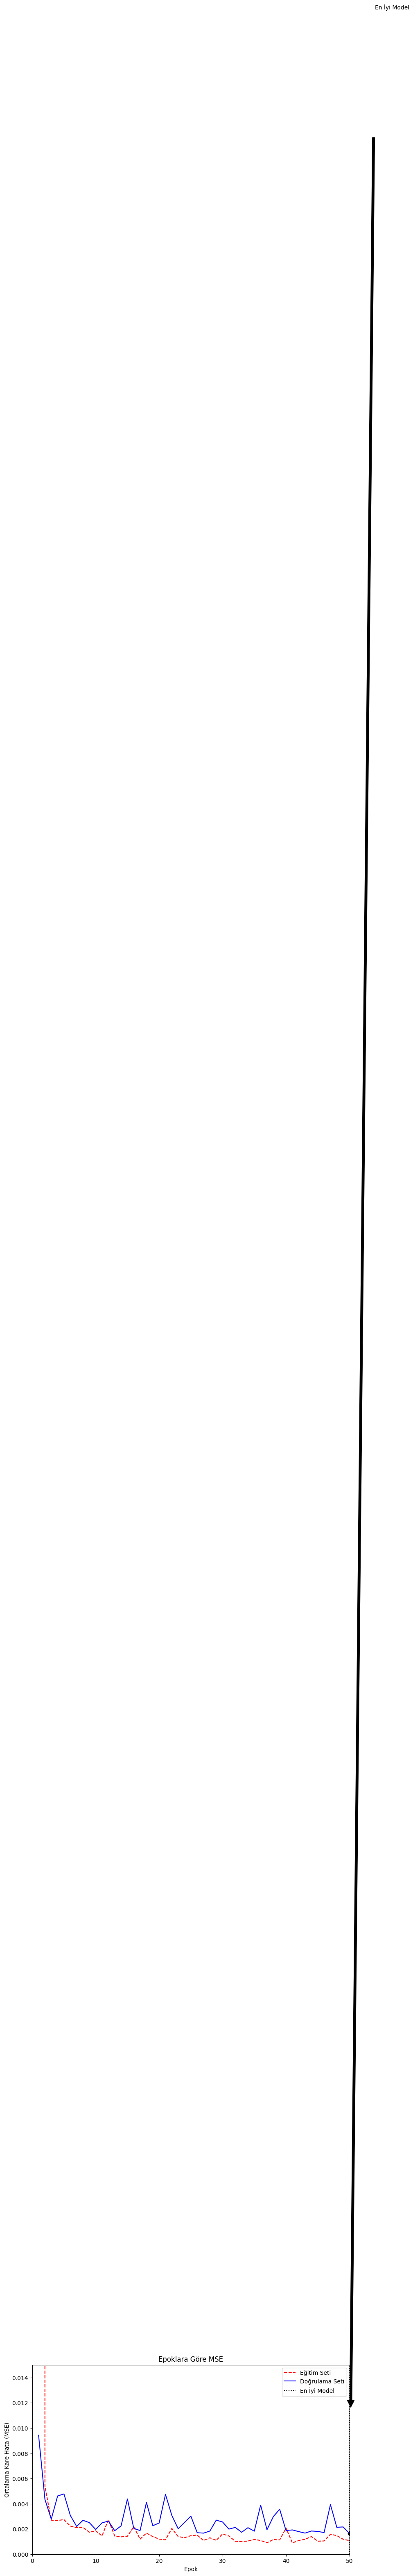

In [ ]:
train_loss = history6.history['mean_squared_error']
val_loss = history6.history['val_mean_squared_error']

# En iyi modeli bulma
best_epoch = np.argmin(val_loss)
best_val_loss = val_loss[best_epoch]

# Grafik çizme
epochs = range(1, 51)
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'r--', label='Eğitim Seti')
plt.plot(epochs, val_loss, 'b-', label='Doğrulama Seti')

# En iyi modele ait çizgileri ekleme
plt.axvline(best_epoch + 1, color='k', linestyle=':', label='En İyi Model')  # +1 çünkü epoklar grafikte 1'den başlıyor
plt.scatter(best_epoch + 1, best_val_loss, color='black')  # En iyi model noktasını işaretleme

# Metin ekleme
plt.annotate('En İyi Model', xy=(best_epoch + 1, best_val_loss), xytext=(best_epoch + 5, best_val_loss + 0.2),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel('Epok')
plt.ylabel('Ortalama Kare Hata (MSE)')
plt.legend()
plt.title('Epoklara Göre MSE')
plt.ylim(0, 0.015)  # Y eksenini 0 ile 1 arasında sınırlandırma
plt.xlim(0, 50)  # X eksenini 0 ile 50 epok arasında sınırlandırma
plt.show()

In [ ]:
test_y = pd.read_csv('/content/sample_submission.csv')
test_y

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [ ]:
sam_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,age,garage_age,remodel_age
0,-0.874411,RH,0.529758,0.363804,Pave,None,Reg,Lvl,AllPub,Inside,...,MnPrv,None,-0.092212,-0.038268,1.713318,WD,Normal,0.413643,TA,1.177987
1,-0.874411,RL,0.577524,0.897553,Pave,None,IR1,Lvl,AllPub,Corner,...,None,Gar2,19.723675,-0.038268,1.713318,WD,Normal,0.512222,TA,1.319952
2,0.061330,RL,0.243165,0.809368,Pave,None,IR1,Lvl,AllPub,Inside,...,MnPrv,None,-0.092212,-1.140224,1.713318,WD,Normal,-0.769313,TA,-0.572922
3,0.061330,RL,0.434227,0.032053,Pave,None,IR1,Lvl,AllPub,Inside,...,None,None,-0.092212,-0.038268,1.713318,WD,Normal,-0.802173,TA,-0.572922
4,1.464941,RL,-1.237565,-0.971475,Pave,None,IR1,HLS,AllPub,Inside,...,None,None,-0.092212,-1.874861,1.713318,WD,Normal,-0.605014,TA,-0.288991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2.400682,RM,-2.288406,-1.590785,Pave,None,Reg,Lvl,AllPub,Inside,...,None,None,-0.092212,-0.038268,-1.359492,WD,Normal,-0.013536,None,0.562803
1455,2.400682,RM,-2.288406,-1.599260,Pave,None,Reg,Lvl,AllPub,Inside,...,None,None,-0.092212,-0.772905,-1.359492,WD,Abnorml,-0.013536,TA,0.562803
1456,-0.874411,RL,4.350998,2.054445,Pave,None,Reg,Lvl,AllPub,Inside,...,None,None,-0.092212,1.063688,-1.359492,WD,Abnorml,0.315063,TA,-0.667566
1457,0.646168,RL,-0.330021,0.125484,Pave,None,Reg,Lvl,AllPub,Inside,...,MnPrv,Shed,1.017478,0.329051,-1.359492,WD,Normal,-0.736453,None,-0.478278


In [ ]:
from sklearn.preprocessing import LabelEncoder


# LabelEncoder kullanımı
encoder = OrdinalEncoder()
sam_test[non_numerical_features] = sam_test[non_numerical_features].astype(str)
sam_test[non_numerical_features] = encoder.fit_transform(sam_test[non_numerical_features])

print(sam_test)

      MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
0      -0.874411       3.0     0.529758  0.363804     1.0    1.0       3.0   
1      -0.874411       4.0     0.577524  0.897553     1.0    1.0       0.0   
2       0.061330       4.0     0.243165  0.809368     1.0    1.0       0.0   
3       0.061330       4.0     0.434227  0.032053     1.0    1.0       0.0   
4       1.464941       4.0    -1.237565 -0.971475     1.0    1.0       0.0   
...          ...       ...          ...       ...     ...    ...       ...   
1454    2.400682       5.0    -2.288406 -1.590785     1.0    1.0       3.0   
1455    2.400682       5.0    -2.288406 -1.599260     1.0    1.0       3.0   
1456   -0.874411       4.0     4.350998  2.054445     1.0    1.0       3.0   
1457    0.646168       4.0    -0.330021  0.125484     1.0    1.0       3.0   
1458    0.061330       4.0     0.243165 -0.038777     1.0    1.0       3.0   

      LandContour  Utilities  LotConfig  ...  Fence  MiscFeatur

In [ ]:
predictions = modelbest.predict(sam_test)
predictions

46/46 [==============================] - 2s 30ms/step


array([[0.1303642 ],
       [0.18935637],
       [0.21535075],
       ...,
       [0.19225201],
       [0.13975756],
       [0.29538578]], dtype=float32)

In [ ]:

test_y['SalePrice']=predictions
test_y.head()


,Id,SalePrice
0,1461,0.130364
1,1462,0.189356
2,1463,0.215351
3,1464,0.220873
4,1465,0.207201


In [ ]:
test_y["SalePrice"] = [x * (y_max - y_min) + y_min for x in test_y['SalePrice']]


In [ ]:
test_y

,Id,SalePrice
0,1461,129132.676784
1,1462,171588.697836
2,1463,190296.563836
3,1464,194270.899401
4,1465,184431.379906
...,...,...
1454,2915,95900.670390
1455,2916,88430.523868
1456,2917,173672.656902
1457,2918,135892.977666


In [ ]:
test_y.to_csv('sample_submission.csv', index=False)
